<a href="https://colab.research.google.com/github/yuelinwen/facial-expression-recognition/blob/main/facial_expression_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

np.random.seed(7)
df = pd.read_csv("fer2013.csv")
print(df.head(5))
emotion_categoreis= ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


In [ ]:
#for CNN approach
X = np.array([np.fromstring(pixels, dtype=int, sep=' ').reshape(48, 48, 1) for pixels in df["pixels"]])
Y = to_categorical(df["emotion"])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

X_train = X_train / 255.0
X_test = X_test / 255.0

def facial_expression_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(Y.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

CNN_model = facial_expression_model()
print(CNN_model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16928)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,166,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,168,135 (8.27 MB)

 Trainable params: 2,168,135 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
scores = CNN_model.evaluate(X_test, y_test, verbose=0)
print("CNN error before training: %.2f%%" % (100 - scores[1] * 100))

CNN_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)

scores = CNN_model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100 - scores[1] * 100))

CNN error before training: 83.60%
Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 47s 423ms/step - accuracy: 0.2378 - loss: 1.9687 - val_accuracy: 0.3459 - val_loss: 1.6714
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 48s 440ms/step - accuracy: 0.3597 - loss: 1.6461 - val_accuracy: 0.3961 - val_loss: 1.5904
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 79s 412ms/step - accuracy: 0.4037 - loss: 1.5549 - val_accuracy: 0.4208 - val_loss: 1.5353
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 91s 497ms/step - accuracy: 0.4368 - loss: 1.4874 - val_accuracy: 0.4265 - val_loss: 1.5104
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 75s 432ms/step - accuracy: 0.4576 - loss: 1.4433 - val_accuracy: 0.4336 - val_loss: 1.4899
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 80s 416ms/step - accuracy: 0.4683 - loss: 1.4104 - val_accuracy: 0.4440 - val_loss: 1.4650
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 86s 453ms/step - accuracy: 0.4855 - loss: 1.3744 - val_accuracy: 0.4498 - val_loss: 1.4548
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 81s 446ms

Predicted Label: 3
True Label: 3
The emotion perdicted is Happy
The emotion actual is Happy


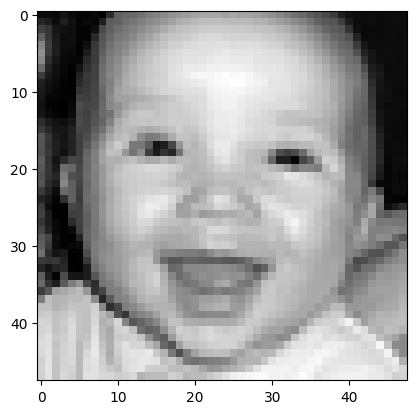

In [ ]:
import matplotlib.pyplot as plt
CNNpredict = CNN_model.predict(X_test, verbose=0)
y_Hat = np.argmax(CNNpredict, axis=1)
n = 14340
print("Predicted Label:", y_Hat[n])
print("True Label:", np.argmax(y_test[n]))
print("The emotion perdicted is", emotion_categoreis[y_Hat[n]])
print("The emotion actual is", emotion_categoreis[np.argmax(y_test[n])])
plt.imshow(X_test[n].reshape(48, 48), cmap='gray')
plt.show()

In [ ]:
# for MLP
X = np.array([np.fromstring(pixels, dtype=int, sep=' ') for pixels in df["pixels"]])
Y = to_categorical(df["emotion"])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

X_train = X_train / 255.0
X_test = X_test / 255.0

def facial_expression_mlp():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(2304,)))
    model.add(Dropout(0.3))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(Y.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

MLP_model = facial_expression_mlp()
print(MLP_model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,345,287 (5.13 MB)

 Trainable params: 1,345,287 (5.13 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
scores = MLP_model.evaluate(X_test, y_test, verbose=0)
print("MLP error before training: %.2f%%" % (100 - scores[1] * 100))

MLP_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)

scores = MLP_model.evaluate(X_test, y_test, verbose=0)
print("MLP Error: %.2f%%" % (100 - scores[1] * 100))

MLP error before training: 86.69%
Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.2176 - loss: 1.9283 - val_accuracy: 0.2545 - val_loss: 1.7928
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.2562 - loss: 1.7953 - val_accuracy: 0.2920 - val_loss: 1.7623
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 77ms/step - accuracy: 0.2755 - loss: 1.7640 - val_accuracy: 0.3169 - val_loss: 1.7441
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.3022 - loss: 1.7362 - val_accuracy: 0.3264 - val_loss: 1.6930
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.2947 - loss: 1.7363 - val_accuracy: 0.3186 - val_loss: 1.7049
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.3024 - loss: 1.7171 - val_accuracy: 0.3124 - val_loss: 1.7089
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.3036 - loss: 1.7289 - val_accuracy: 0.3123 - val_loss: 1.7137
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accura

# New Section

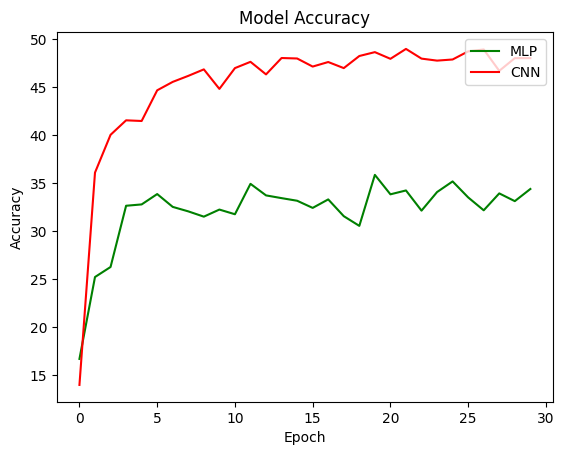

In [ ]:
#MLP results
epoch_accuracy = [[0, 16.691048443317413], [1, 25.224661827087402], [2, 26.269593834877014], [3, 32.65064358711243], [4, 32.7899694442749], [5, 33.869731426239014], [6, 32.53221809864044], [7, 32.06548094749451], [8, 31.515151262283325], [9, 32.25356936454773], [10, 31.765934824943542], [11, 34.935563802719116], [12, 33.73040854930878], [13, 33.44479203224182], [14, 33.17311108112335], [15, 32.427725195884705], [16, 33.31243395805359], [17, 31.563913822174072], [18, 30.5538147687912], [19, 35.86903512477875], [20, 33.84186625480652], [21, 34.24590826034546], [22, 32.14211165904999], [23, 34.07871723175049], [24, 35.18634736537933], [25, 33.52141976356506], [26, 32.17694163322449], [27, 33.93939435482025], [28, 33.13131332397461], [29, 34.39916372299194]]
#CNN results
epoch_accuracy2 = [[0, 13.98119181394577], [1, 36.10588610172272], [2, 40.04179835319519], [3, 41.5534645318985], [4, 41.4838045835495], [5, 44.68129575252533], [6, 45.55903971195221], [7, 46.18599712848663], [8, 46.86172008514404], [9, 44.82758641242981], [10, 46.994078159332275], [11, 47.64890372753143], [12, 46.339255571365356], [13, 48.04597795009613], [14, 47.997212409973145], [15, 47.154301404953], [16, 47.62800335884094], [17, 46.994078159332275], [18, 48.254963755607605], [19, 48.65900278091431], [20, 47.962382435798645], [21, 48.99338185787201], [22, 47.9832798242569], [23, 47.77429401874542],[24, 47.89271950721741], [25, 48.73563349246979], [26, 48.93765151500702], [27, 46.70846462249756], [28, 48.03204536437988], [29, 48.03204536437988]]

epoch_df = pd.DataFrame(epoch_accuracy, columns=['Epoch', 'Accuracy'])
epoch_df2 = pd.DataFrame(epoch_accuracy2, columns=['Epoch', 'Accuracy'])
plt.plot(epoch_df['Epoch'], epoch_df['Accuracy'], color = "green", label = "MLP")
plt.plot(epoch_df2['Epoch'], epoch_df2['Accuracy'], color = "red", label = "CNN")
plt.legend(loc="upper right")
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()